In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
#0-->Non-diabetic,1-->Diabetic
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


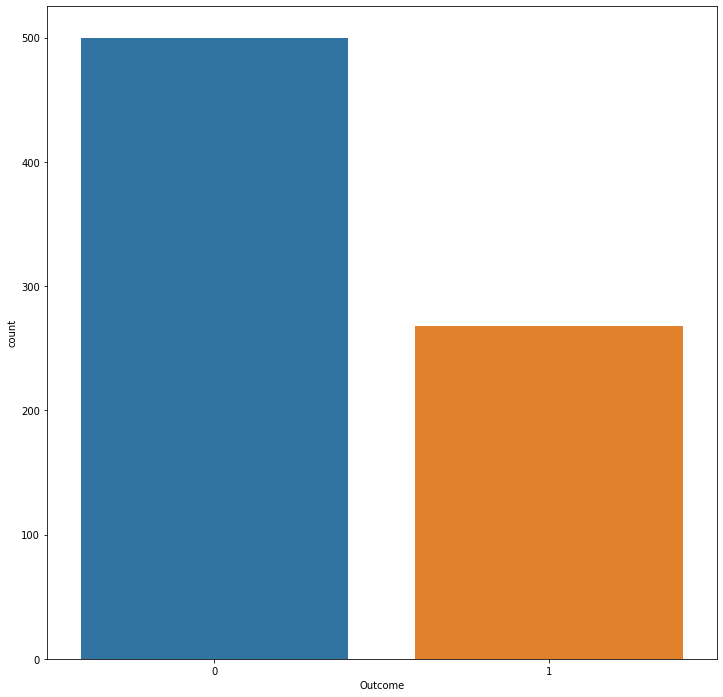

In [7]:
plt.figure(figsize=(12,12))
sns.countplot(df['Outcome'])

In [9]:
df.describe().style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


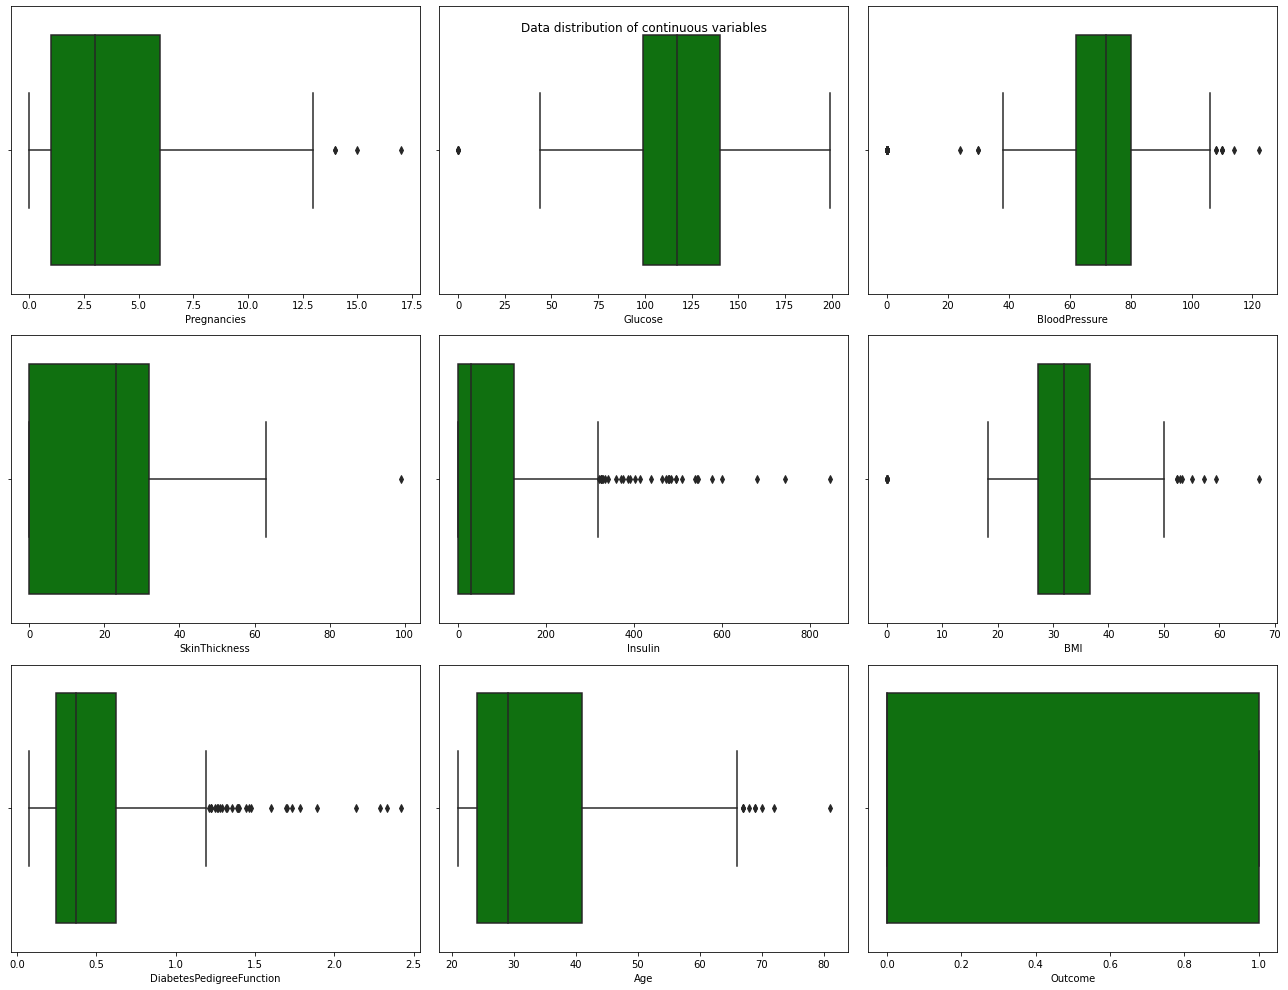

In [15]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='green')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [16]:
def outlier_treating(data,var):
    df=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(df[i])#calling outlier_detector function 
        df.loc[out_var,i]=np.median(df[i])#replacing the outliers to the median
    return df

In [17]:
var=list(df.columns)

In [18]:
df=outlier_treating(df,var)

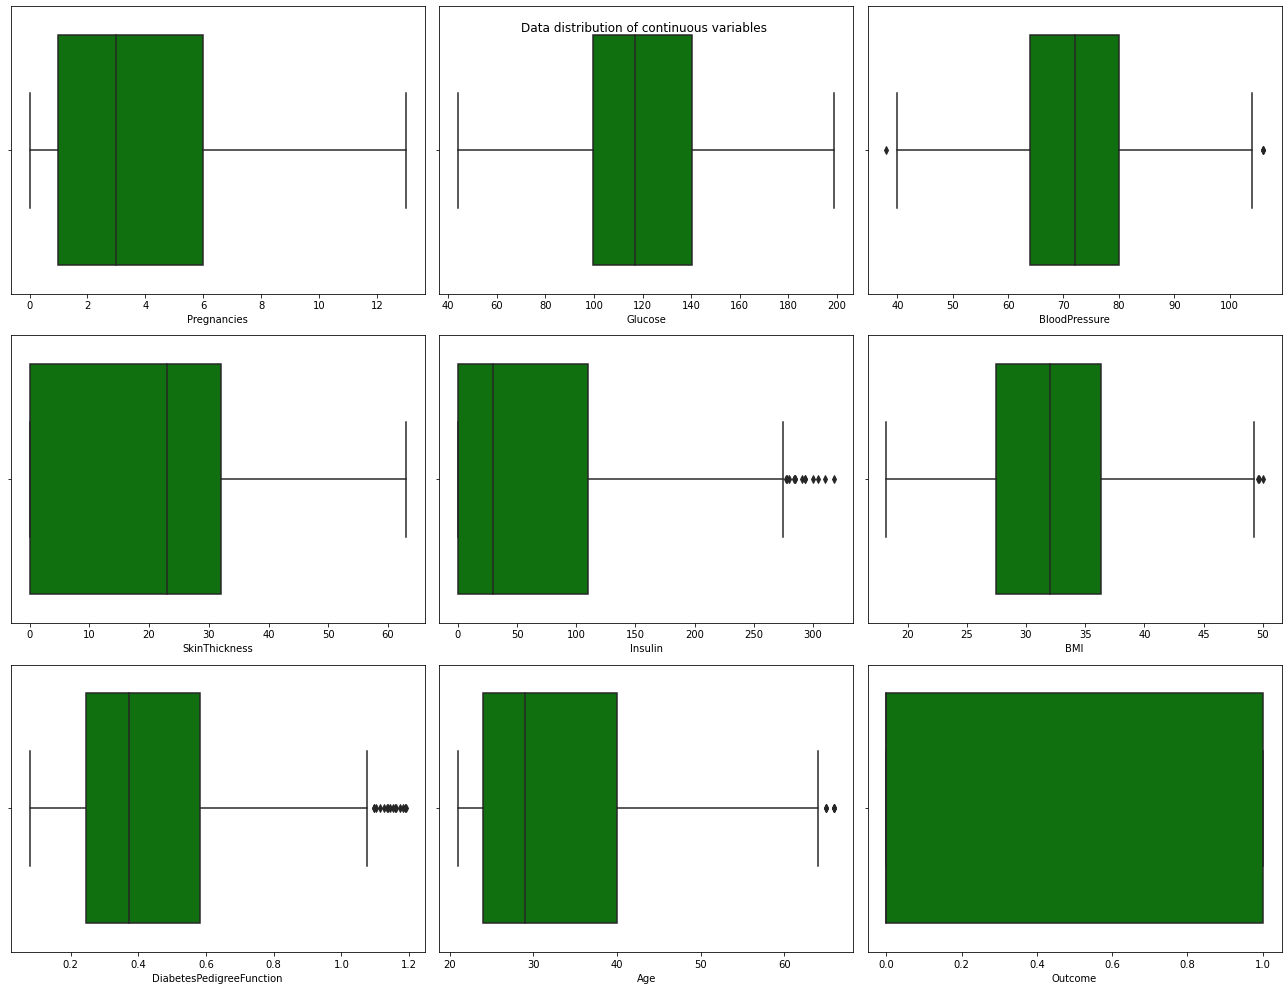

In [19]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='green')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

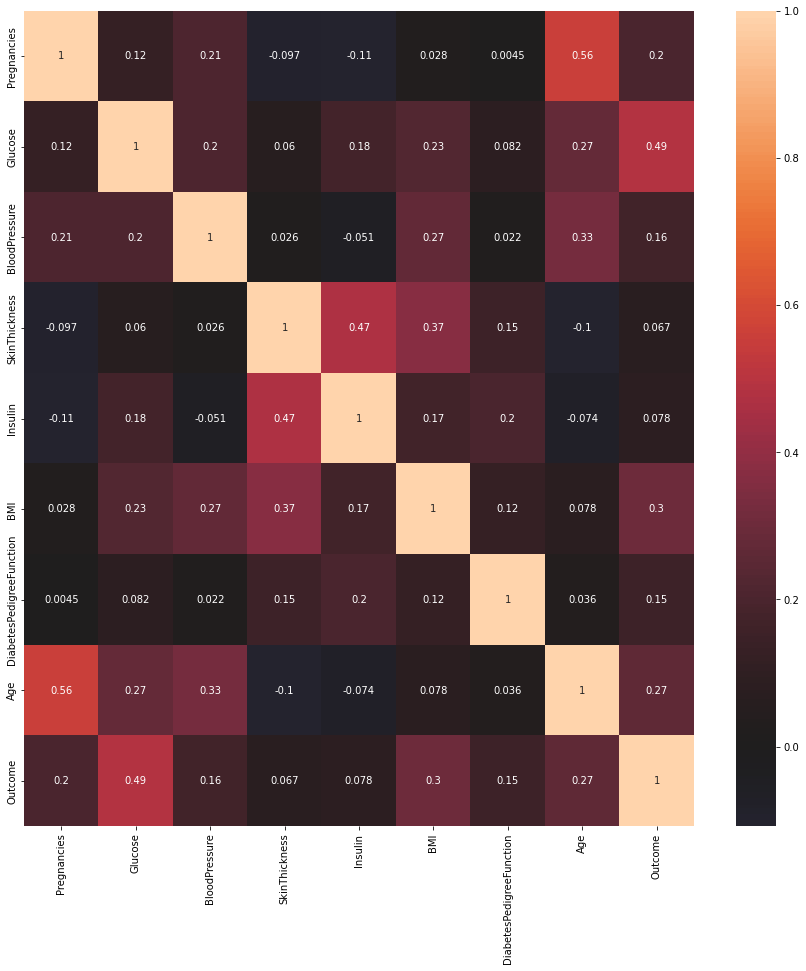

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,center = 0)
plt.show()

In [22]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [25]:
#Balance the imbalanced data
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [27]:
X,y=sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


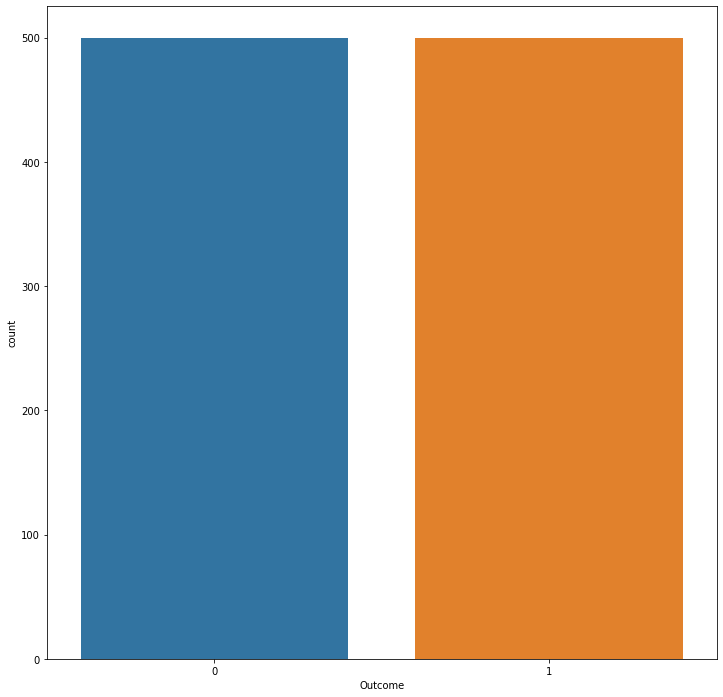

In [28]:
#Rechecking the balance of data
plt.figure(figsize=(12,12))
sns.countplot(y)
plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif#ANOVA

In [30]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

SelectKBest(k='all')

In [31]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

Pregnancies : 5.27%
Glucose : 51.80%
BloodPressure : 3.99%
SkinThickness : 0.95%
Insulin : 1.55%
BMI : 19.09%
DiabetesPedigreeFunction : 5.18%
Age : 12.18%


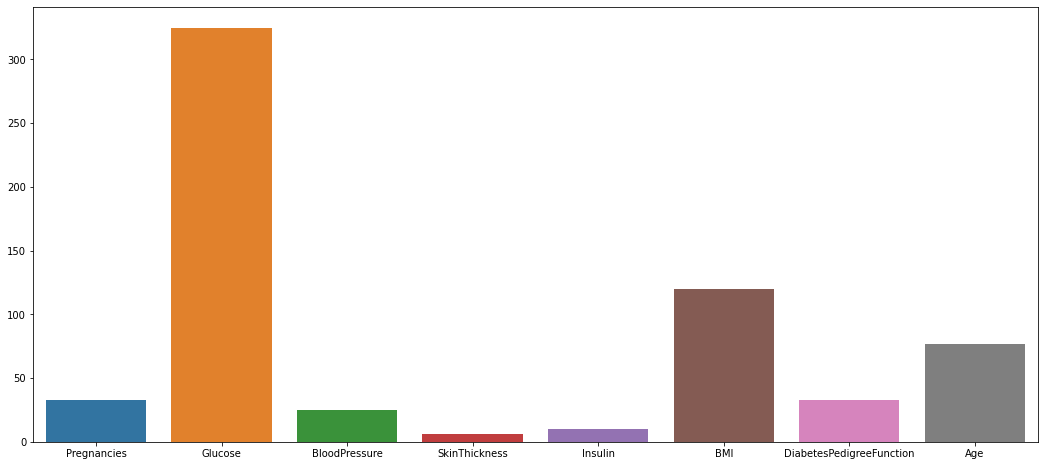

In [32]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(18,8))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [33]:
X1=X[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age']]

In [34]:
#Splitting data
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,stratify=y,random_state=0)

In [36]:
#Scaling data
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [39]:
model_acc={}

In [45]:
#Random forest
classifier1=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train,y_train)
y_pred=classifier1.predict(X_test)
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 77.25 %
Cross Val Standard Deviation: 2.97 %
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       105
           1       0.75      0.79      0.77        95

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



In [46]:
#XGBoost
classifier2 = XGBClassifier()
classifier2.fit(X_train,y_train)
y_pred=classifier2.predict(X_test)
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 77.62 %
Cross Val Standard Deviation: 2.38 %
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.79      0.78      0.79       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



In [47]:
#SVC
classifier3=SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train,y_train)
y_pred=classifier3.predict(X_test)
accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['Support Vector Classifier']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 73.38 %
Cross Val Standard Deviation: 4.30 %
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       108
           1       0.71      0.77      0.74        92

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [48]:
#KNN
classifier4=KNeighborsClassifier()
classifier4.fit(X_train,y_train)
y_pred=classifier4.predict(X_test)
accuracies = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_acc['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Cross Val Accuracy: 76.25 %
Cross Val Standard Deviation: 3.45 %
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        96
           1       0.82      0.79      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [44]:
#Model Accuracy
Model_com_df=pd.DataFrame(model_acc).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
KNN,80.00%,80.01%,76.25%,3.45%
Xg Boost,78.50%,78.50%,77.62%,2.38%
Random Forest,77.50%,77.51%,77.25%,2.97%
Support Vector Classifier,75.00%,75.04%,73.38%,4.30%


In [49]:
input_data = (5,166,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier4.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [51]:
#Saving model
import pickle

In [52]:
filename = 'diabetes_model.sav'
pickle.dump(classifier4, open(filename, 'wb'))

In [53]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [54]:
input_data = (5,166,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
